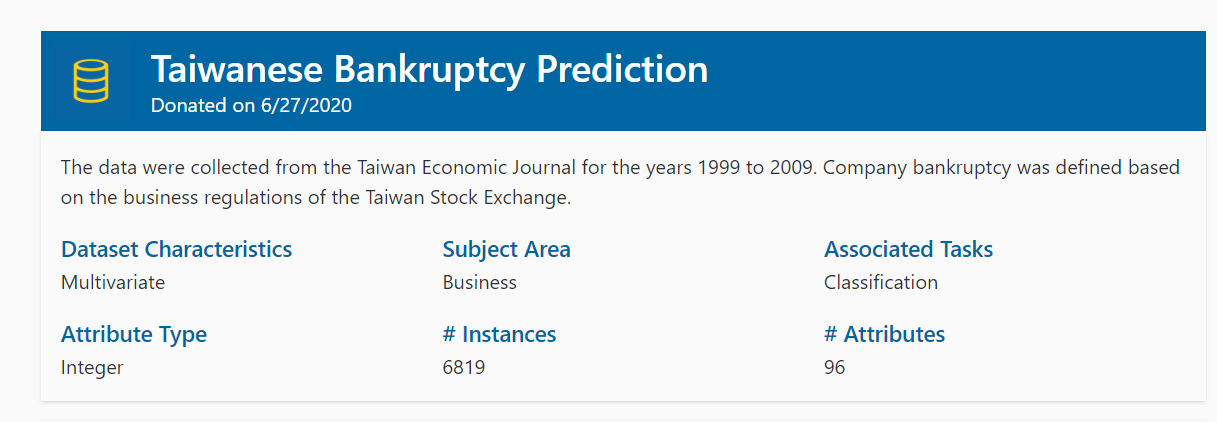


##  Data    
<a href="https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction">UCI Machine Learning</a>,   <a href="https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction">Kaggle</a>
    

## Objectives

After completing this lab you will be able to:

* Use <a href="https://snapml.readthedocs.io/en/latest/decision_trees.html">IBM snapML</a> Decision Tree to classify default or not


## **Additional Information**
Additional Information

The first attribute is the class lable. <br>
X1	Cost of Interest-bearing Debt <br>
X2	Cash Reinvestment Ratio <br>
X3	Current Ratio <br>
X4	Acid Test   <br>
X5	Interest Expenses/Total Revenue <br>
X6	Total Liability/Equity Ratio <br>
X7	Liability/Total Assets <br>
X8	Interest-bearing Debt/Equity <br>
X9	Contingent Liability/Equity <br>
X10	Operating Income/Capital <br>

For more about the remaining features please check on the links above:

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Load the Default of Credit Card Clients data</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


## import packages


In [1]:
#pip install --upgrade pip

In [2]:
#!pip install snapml

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
%matplotlib inline 
import matplotlib.pyplot as plt

# dealing with imbalance classes
from imblearn.over_sampling import SMOTE
from collections import Counter

# suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data From CSV File  


In [4]:
Taiwanese_Bankruptcy = pd.read_csv("Taiwan Bankruptcy.csv")
Taiwanese_Bankruptcy.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# shape
Taiwanese_Bankruptcy.shape

(6819, 96)

## Basic EDA

In [6]:
# check the columns
Taiwanese_Bankruptcy.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
# data types
Taiwanese_Bankruptcy.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [8]:
# missing values
Taiwanese_Bankruptcy.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
# value count of the default to see if we are dealing with a balanced or unbalanced dataset
Taiwanese_Bankruptcy['Bankrupt?'].value_counts(normalize=True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

**Outcome column** : is unbalance with no-bankruptvy making 96.77% of the data set and Bankruptcy 3.226%.

In [10]:
# let's rename 'Bankrupt?' to 'Bankrupt'
Taiwanese_Bankruptcy.rename(columns={'Bankrupt?': 'Bankrupt'},inplace=True, errors='raise')

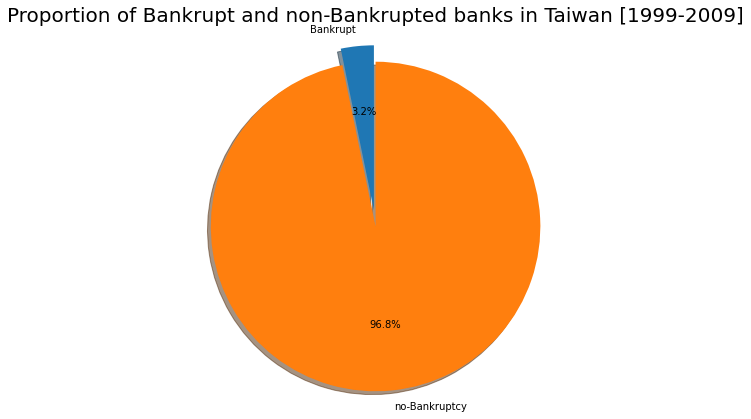

In [11]:
# visualize in a pie chart the Default vs not Default 
labels = 'Bankrupt', 'no-Bankruptcy'
sizes = [Taiwanese_Bankruptcy.Bankrupt[Taiwanese_Bankruptcy['Bankrupt']==1].count(), Taiwanese_Bankruptcy.Bankrupt[Taiwanese_Bankruptcy['Bankrupt']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Bankrupt and non-Bankrupted banks in Taiwan [1999-2009]", size = 20)
plt.show()

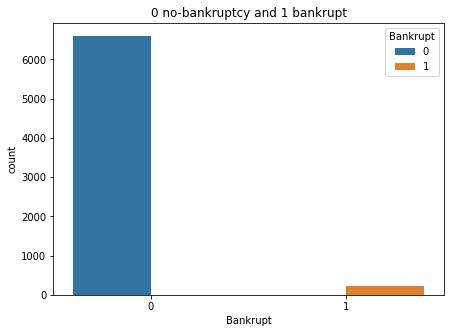

In [12]:
# now let's visualize the outcome
plt.figure(figsize=(7,5))
sns.countplot(data=Taiwanese_Bankruptcy , x='Bankrupt', hue='Bankrupt').set(title = "0 no-bankruptcy and 1 bankrupt");

## Data pre-processing and selection


### Assign y(target) and X(input/features):

In [13]:
# target value
y =  Taiwanese_Bankruptcy['Bankrupt']

In [14]:
# let's drop the 'default payment next month' column
Taiwanese_Bankruptcy.drop(['Bankrupt'], axis = 1, inplace = True) 

## Train/Test dataset


We split our dataset into train and test set:


In [15]:
X = Taiwanese_Bankruptcy.copy()
y = y.copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5455, 95) (5455,)
Test set: (1364, 95) (1364,)


## Feature scaling


In [17]:
scaler = StandardScaler() # scaler objecy
X_train = scaler.fit_transform(X_train.to_numpy()) # allow the scaler object to learn the features and transform the training data
X_test =  scaler.transform(X_test.to_numpy()) # apply the learned features on the test set

In [18]:
# scaled x_train
X_train = np.asarray(X_train)
X_train.shape 

(5455, 95)

In [19]:
# scaled x_test
X_test = np.asarray(X_test)
X_test.shape 

(1364, 95)

<div id="svm_snap">
    <h2>Build a RandomForest model with Snap ML</h2>
</div>


In [20]:
%%time
# import the RandomForest from Snap ML
from snapml import RandomForestClassifier as SnapForest

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of RandomForest
# to use the GPU, set the use_gpu parameter to True
# rf = SnapForest(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
rf = SnapForest(n_estimators=10, criterion='gini', 
                            max_depth=4, min_samples_leaf=1, 
                            max_features='auto', bootstrap=True, 
                            n_jobs=1, random_state=None, verbose=False, 
                            use_histograms=False, hist_nbins=256, 
                            use_gpu=False, gpu_ids=[0], 
                            compress_trees=False)

# train an SVM model using Snap ML
clf = rf.fit(X_train, y_train)

CPU times: total: 250 ms
Wall time: 839 ms


After being fitted, the model can then be used to predict new values:


In [21]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

<h2 id="evaluation">Evaluation</h2>


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.50      0.14      0.21        44

    accuracy                           0.97      1364
   macro avg       0.74      0.57      0.60      1364
weighted avg       0.96      0.97      0.96      1364

Confusion matrix, without normalization
[[1314    6]
 [  38    6]]


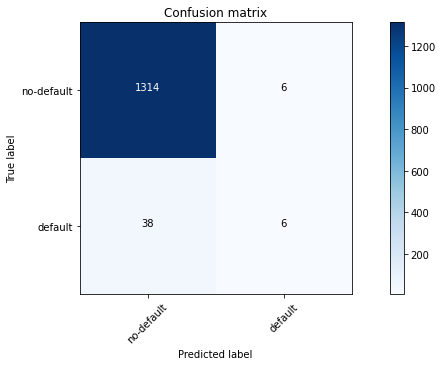

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
#np.set_printoptions(precision=2)

print (classification_report(y_test, yhat,labels=np.unique(yhat)))

# Plot non-normalized confusion matrix
plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, ['no-default','default'],normalize= False,  title='Confusion matrix')

You can also easily use the __f1_score__ from sklearn library:


In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9587185076850905

Let's try the jaccard index for accuracy:


In [26]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.12

### Pickle the model:

We'll pickle the model so we don't have to refit it every time we run this notebook. Remember, there are three steps:

   1. Define the path to the location where it will save
   2. Write the file (i.e., save the model)
   3. Read the model back in

In [27]:
# This module lets us save our models once we fit them.
import pickle

# Pickle the model
with open('Taiwan_Bankruptcy(RF-snapML).pickle', 'wb') as to_write:
    pickle.dump(rf, to_write) 

In [28]:
# Open pickled model
with open('Taiwan_Bankruptcy(RF-snapML).pickle', 'rb') as to_read:
    rf_snapML = pickle.load(to_read)

<h2 id="practice">Practice</h2>
Now use a <a href="https://snapml.readthedocs.io/en/latest/boosting_machines.html">Boosting Machine Classifier</a> to see how the decision change.

### Boosting Machine Classifier

In [29]:
%%time
# import the BoostingMachineClassifier from Snap ML
from snapml import BoostingMachineClassifier as BoostMachine

Booting_clf = BoostMachine(n_jobs=1, num_round=100, max_depth=4, 
                                 min_max_depth=1, max_max_depth=5, early_stopping_rounds=10, 
                                 random_state=0, base_score=None, learning_rate=0.1, verbose=False, 
                                 compress_trees=False, class_weight=None, use_histograms=True, 
                                 hist_nbins=256, use_gpu=False, gpu_ids=[0], colsample_bytree=1.0,
                                 subsample=1.0, lambda_l2=0.0, 
                                 tree_select_probability=1.0, regularizer=1.0,
                                 fit_intercept=False, gamma=1.0, n_components=10)


Booting_clf.fit(X_train, y_train) 
yhat2 = Booting_clf.predict(X_test)
# print the F1-score and jaccard_score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))

Avg F1-score: 0.9618
Jaccard score: 0.1852
CPU times: total: 641 ms
Wall time: 1.36 s


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.50      0.23      0.31        44

    accuracy                           0.97      1364
   macro avg       0.74      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364

Confusion matrix, without normalization
[[1310   10]
 [  34   10]]


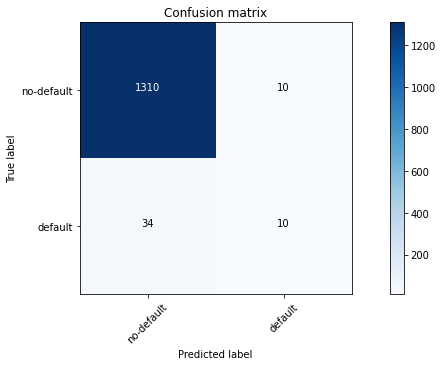

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2)
#np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2,labels=np.unique(yhat2)))

# Plot non-normalized confusion matrix
plt.figure(figsize=(11,5))
plot_confusion_matrix(cnf_matrix, classes=['no-default','default'],normalize= False,  title='Confusion matrix')

### Save the boosting machine model:

In [31]:
# This module lets us save our models once we fit them.
import pickle

# Pickle the model
with open('Taiwan_Bankrutpcy(Boost-snapML).pickle', 'wb') as to_write:
    pickle.dump(Booting_clf, to_write) 

In [32]:
# Open pickled model
with open('Taiwan_Bankrutpcy(Boost-snapML).pickle', 'rb') as to_read:
    boosting_snapML = pickle.load(to_read)

### Thank you for completing this lab!

